## TRAJECTORY ANALYSIS

## DNA unwrapping

In [4]:
import io, requests, pynucl, warnings,sys,os,logging
warnings.filterwarnings('ignore')

from plotnine import *
import numpy as np
import pandas as pd
from tqdm.auto import tqdm
from MDAnalysis.coordinates.memory import MemoryReader
from scipy.spatial import distance
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt 
import seaborn as sns

/opt/miniconda3/envs/moldyn/lib/python3.7/site-packages/Bio/Align/substitution_matrices/__init__.py:21: BiopythonExperimentalWarning: Bio.Align.substitution_matrices is an experimental module which may still undergo significant changes. In particular, the location of this module may change, and the Array class defined in this module may be moved to other existing or new modules in Biopython.
  BiopythonExperimentalWarning)


In [5]:
sys_list=[{'s':'K150','ref':'1KX5'},
          {'s':'Na150','ref':'1KX5'},
          {'s':'K3000','ref':'1KX5'},
          {'s':'K3000a','ref':'1KX5'},
          {'s':'sK3000b','ref':'1KX5'},
          {'s':'Na3000','ref':'1KX5'},
          {'s':'Na3000a','ref':'1KX5'},
          {'s':'Na3000b','ref':'1KX5'}]

nconv={'K150':'NCP$_{187}^{tt}$',
       'Na150':'NCP$_{187}^{tt}$',
       'K3000':'NCP$_{187}^{tt}$',
       'K3000a':'NCP$_{187}^{tt}$',
       'K3000b':'NCP$_{187}^{tt}$',
       'Na3000':'NCP$_{187}^{tt}$',
       'Na3000a':'NCP$_{187}^{tt}$',
       'Na3000b':'NCP$_{187}^{tt}$'}

p={}
DNA={}
unw_contD={}
unw_posD={}

In [7]:
for i in sys_list:
    s=i['s']
    ref_pdb=i['ref']
    # load reference from PDB
    pdb=io.StringIO(requests.get('https://files.rcsb.org/download/%s.pdb'%(ref_pdb)).content.decode("utf-8") )
    p[ref_pdb+'_pdb']=pynucl.nuclstr('trajectories/init.pdb')
    # load trajectories
    p[s]=pynucl.nucltrj(f'trajectories/{s}.pdb',f'trajectories/{s}.xtc',time=(0,None,1))

1 frames loaded for None
934 frames loaded for K3000


In [ ]:
for i in sys_list:
    s=i['s']
    ref_pdb=i['ref']
    DNA[s]=pynucl.a_DNA(p[s],num_threads=20)
    unw_posD[s]=pynucl.a_DNAunw_pos(p[s],DNAparam=DNA[s],ref=p[ref_pdb+'_pdb'],threshold=7)
    unw_contD[s]=pynucl.a_DNAunw_cont(p[s])

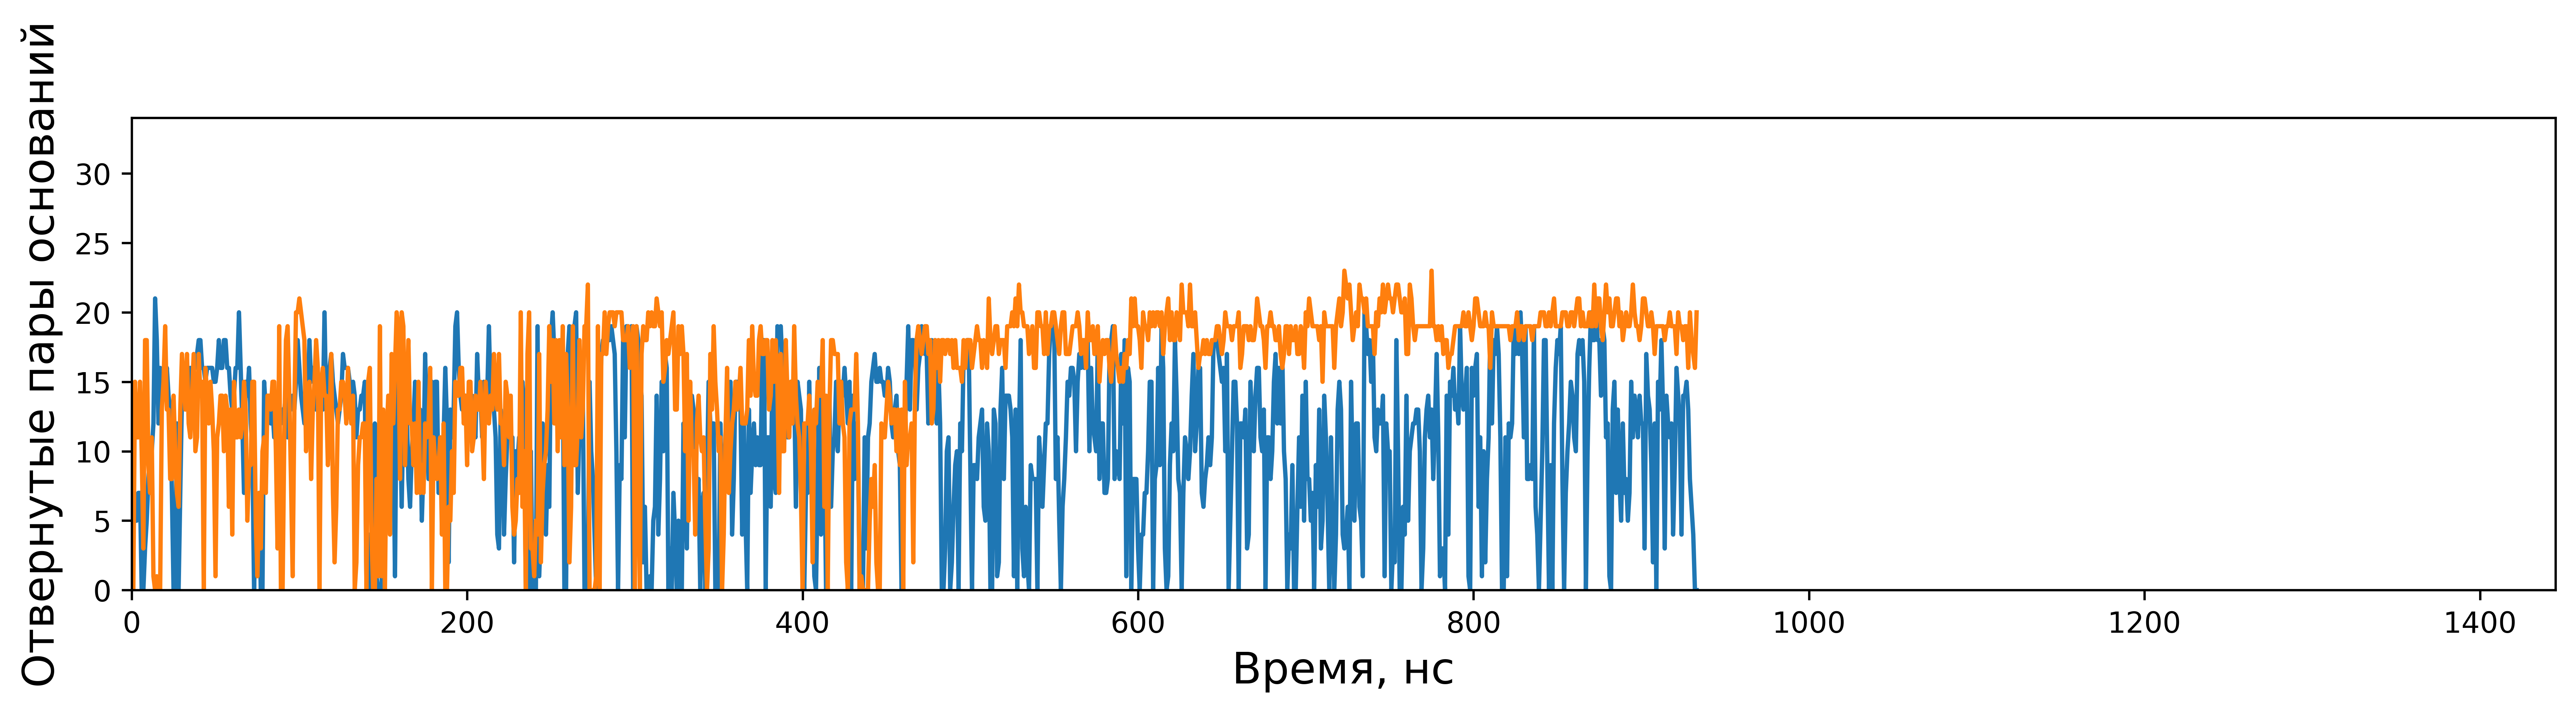

In [66]:
sysname='K3000'
temp_df=unw_posD[sysname].unw
fig,ax=plt.subplots(figsize=(15,3),dpi=600)


sns.lineplot(x=temp_df.Frame,y=temp_df.prox,ax=ax,markers='', linewidth=1.5,color='#1f77b4')

sns.lineplot(x=temp_df.Frame,y=temp_df.dist,ax=ax,markers='', linewidth=1.5,color='#ff7f0e')
ax.set_xlabel('Time, ns', size="15")
ax.set_ylabel('Unwrapped base pairs', size="15")

plt.yticks(ticks=(20,22,24,26,28,30,32,34), labels=(0,2,4,6,8,10,12,14))

#plt.legend()
ax.set_ylim(20,34)
ax.set_xlim(0,940)
plt.show()

## Radial distribution function

In [ ]:
import MDAnalysis as mda
from MDAnalysis.analysis import rdf
import matplotlib.pyplot as plt
%matplotlib inline

u_k = mda.Universe('trajectories/K3000.pdb', 'trajectories/K3000.xtc')
u_na = mda.Universe('trajectories/K3000.pdb', 'trajectories/K3000.xtc')

res60_k1 = u_k.select_atoms("(segid I and resnum 54:73) or (segid J and (resnum -73 and resnum -72 and resnum -71 and resnum -70 and resnum -69 and resnum -68 and resnum -67 and resnum -66 and resnum -65 and resnum -64 and resnum -63 and resnum -62 and resnum -61 and resnum -60 and resnum -59 and resnum -58 and resnum -57 and resnum -56 and resnum -55 and resnum -54)) or (segid J and resnum 5:24) or (segid I and (resnum -24 and resnum -23 and resnum -22 and resnum -21 and resnum -20 and resnum -19 and resnum -18 and resnum -17 and resnum -16 and resnum -15 and resnum -14 and resnum -13 and resnum -12 and resnum -11 and resnum -10 and resnum -9 and resnum -8 and resnum -7 and resnum -6 and resnum -5))")
res60_k2 = u_k.select_atoms("(segid J and resnum 54:73) or (segid I and (resnum -73 and resnum -72 and resnum -71 and resnum -70 and resnum -69 and resnum -68 and resnum -67 and resnum -66 and resnum -65 and resnum -64 and resnum -63 and resnum -62 and resnum -61 and resnum -60 and resnum -59 and resnum -58 and resnum -57 and resnum -56 and resnum -55 and resnum -54)) or (segid I and resnum 5:24) or (segid J and (resnum -24 and resnum -23 and resnum -22 and resnum -21 and resnum -20 and resnum -19 and resnum -18 and resnum -17 and resnum -16 and resnum -15 and resnum -14 and resnum -13 and resnum -12 and resnum -11 and resnum -10 and resnum -9 and resnum -8 and resnum -7 and resnum -6 and resnum -5))")

res60_na1 = u_na.select_atoms("(segid I and resnum 54:73) or (segid J and (resnum -73 and resnum -72 and resnum -71 and resnum -70 and resnum -69 and resnum -68 and resnum -67 and resnum -66 and resnum -65 and resnum -64 and resnum -63 and resnum -62 and resnum -61 and resnum -60 and resnum -59 and resnum -58 and resnum -57 and resnum -56 and resnum -55 and resnum -54)) or (segid J and resnum 5:24) or (segid I and (resnum -24 and resnum -23 and resnum -22 and resnum -21 and resnum -20 and resnum -19 and resnum -18 and resnum -17 and resnum -16 and resnum -15 and resnum -14 and resnum -13 and resnum -12 and resnum -11 and resnum -10 and resnum -9 and resnum -8 and resnum -7 and resnum -6 and resnum -5))")
res60_na2 = u_na.select_atoms("(segid J and resnum 54:73) or (segid I and (resnum -73 and resnum -72 and resnum -71 and resnum -70 and resnum -69 and resnum -68 and resnum -67 and resnum -66 and resnum -65 and resnum -64 and resnum -63 and resnum -62 and resnum -61 and resnum -60 and resnum -59 and resnum -58 and resnum -57 and resnum -56 and resnum -55 and resnum -54)) or (segid I and resnum 5:24) or (segid J and (resnum -24 and resnum -23 and resnum -22 and resnum -21 and resnum -20 and resnum -19 and resnum -18 and resnum -17 and resnum -16 and resnum -15 and resnum -14 and resnum -13 and resnum -12 and resnum -11 and resnum -10 and resnum -9 and resnum -8 and resnum -7 and resnum -6 and resnum -5))")


res60_kl1 = u_k.select_atoms("((segid I and resnum 74:92) or (segid J and (resnum -74 or resnum -75 or resnum -76 or resnum -77 or resnum -78 or resnum -79 or resnum -80 or resnum -81 or resnum -82 or resnum -83 or resnum -84 or resnum -85 or resnum -86 or resnum -87 or resnum -88 or resnum -89 or resnum -90 or resnum -91 or resnum -92)))")
res60_nal1 = u_na.select_atoms("((segid I and resnum 74:92) or (segid J and (resnum -74 or resnum -75 or resnum -76 or resnum -77 or resnum -78 or resnum -79 or resnum -80 or resnum -81 or resnum -82 or resnum -83 or resnum -84 or resnum -85 or resnum -86 or resnum -87 or resnum -88 or resnum -89 or resnum -90 or resnum -91 or resnum -92)))")

res60_kl2 = u_k.select_atoms("((segid J and resnum 74:92) or (segid I and (resnum -74 or resnum -75 or resnum -76 or resnum -77 or resnum -78 or resnum -79 or resnum -80 or resnum -81 or resnum -82 or resnum -83 or resnum -84 or resnum -85 or resnum -86 or resnum -87 or resnum -88 or resnum -89 or resnum -90 or resnum -91 or resnum -92)))")
res60_nal2 = u_na.select_atoms("((segid J and resnum 74:92) or (segid I and (resnum -74 or resnum -75 or resnum -76 or resnum -77 or resnum -78 or resnum -79 or resnum -80 or resnum -81 or resnum -82 or resnum -83 or resnum -84 or resnum -85 or resnum -86 or resnum -87 or resnum -88 or resnum -89 or resnum -90 or resnum -91 or resnum -92)))")


water_k = u_k.select_atoms('resname K')
water_na = u_na.select_atoms('resname NA')

irdf_k1 = rdf.InterRDF(res60_k1, water_k,
                    nbins=30,
                    range=(0.0, 15.0),  # distance in angstroms
                   )
irdf_k1.run()

irdf_na1 = rdf.InterRDF(res60_na1, water_na,
                    nbins=30,
                    range=(0.0, 15.0),  # distance in angstroms
                   )
irdf_na1.run()

irdf_k2 = rdf.InterRDF(res60_k2, water_k,
                    nbins=30,
                    range=(0.0, 15.0),  # distance in angstroms
                   )
irdf_k2.run()

irdf_na2 = rdf.InterRDF(res60_na2, water_na,
                    nbins=30, 
                    range=(0.0, 15.0),  # distance in angstroms
                   )
irdf_na2.run()



irdf_kl1 = rdf.InterRDF(res60_kl1, water_k,
                    nbins=30,
                    range=(0.0, 15.0),  # distance in angstroms
                   )
irdf_kl1.run()

irdf_nal1 = rdf.InterRDF(res60_nal1, water_na,
                    nbins=30,
                    range=(0.0, 15.0),  # distance in angstroms
                   )
irdf_nal1.run()

irdf_kl2 = rdf.InterRDF(res60_kl2, water_k,
                    nbins=30,
                    range=(0.0, 15.0),  # distance in angstroms
                   )
irdf_kl2.run()

irdf_nal2 = rdf.InterRDF(res60_nal2, water_na,
                    nbins=30,
                    range=(0.0, 15.0),  # distance in angstroms
                   )
irdf_nal2.run()

Text(0, 0.5, 'Radial distribution')

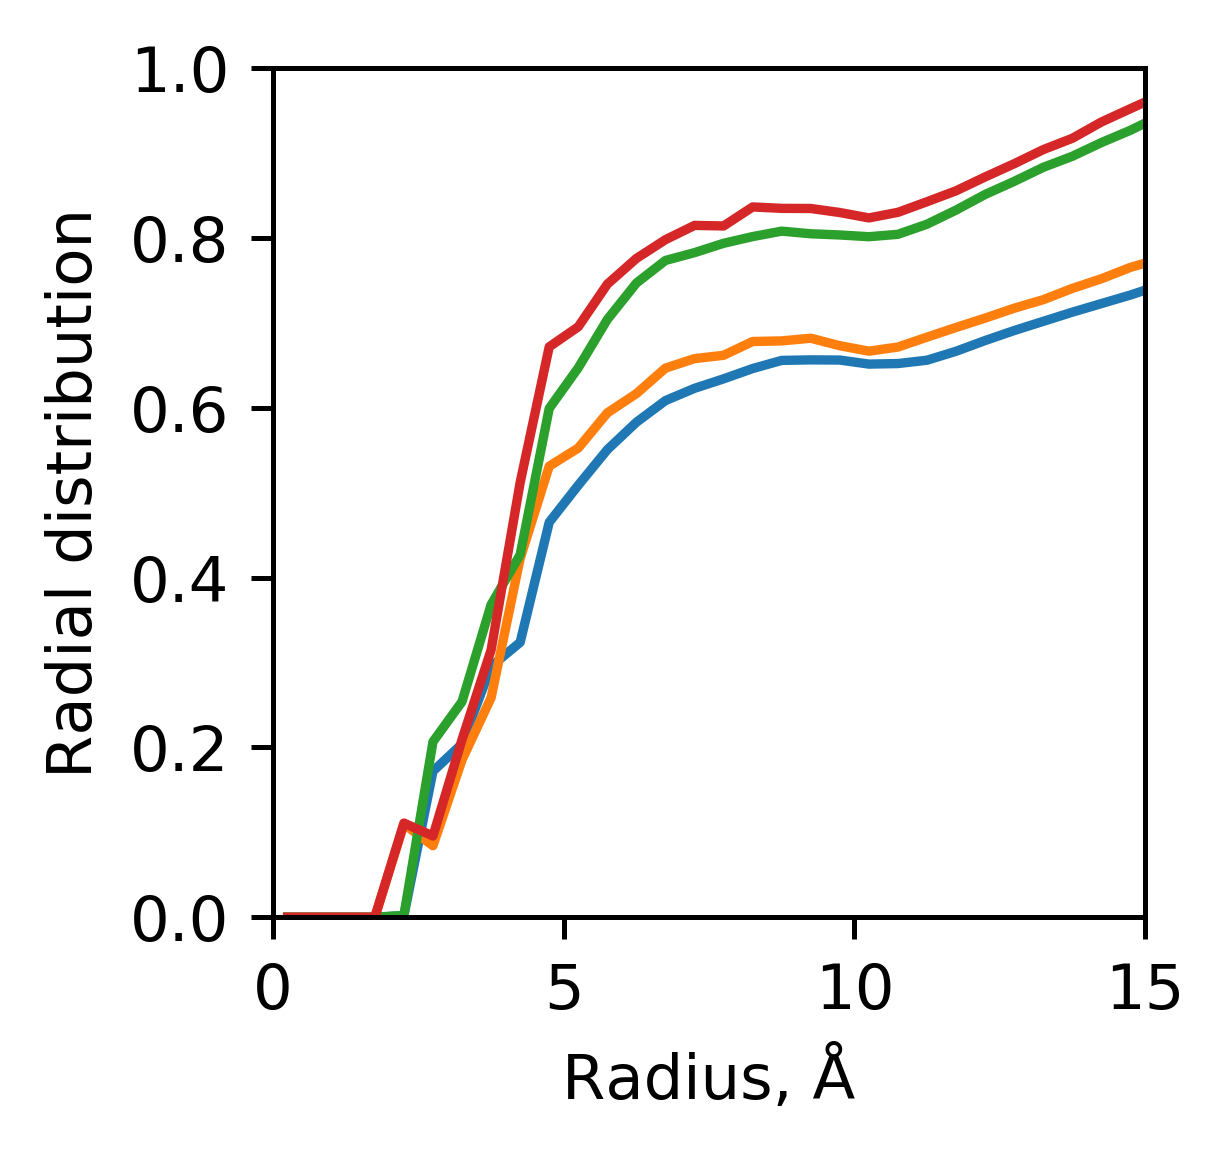

In [23]:
fig,(ax1)=plt.subplots(1,figsize=(2.5,2.5),dpi=450)

ax1.set_ylim(0,1)
ax1.set_xlim(0,15)


plt.plot(irdf_k1.bins, irdf_k1.rdf)
plt.plot(irdf_na1.bins, irdf_na1.rdf)

#plt.plot(irdf_k2.bins, irdf_k2.rdf)
#plt.plot(irdf_na2.bins, irdf_na2.rdf)


plt.plot(irdf_kl1.bins, irdf_kl1.rdf)
plt.plot(irdf_nal1.bins, irdf_nal1.rdf)

#plt.plot(irdf_kl2.bins, irdf_kl2.rdf)
#plt.plot(irdf_nal2.bins, irdf_nal2.rdf)

plt.xlabel('Radius, Å')
plt.ylabel('Radial distribution')

## Survival probability

In [4]:
import MDAnalysis
from MDAnalysis.analysis.waterdynamics import SurvivalProbability as SP

u_k = MDAnalysis.Universe('trajectories/K3000.pdb', 'trajectories/K3000.xtc')
u_na = MDAnalysis.Universe('trajectories/Na3000.pdb', 'trajectories/a3000.xtc')

selection_k1 = ("resname K and around 5 ((segid I and resnum 54:73) or (segid J and (resnum -73 and resnum -72 and resnum -71 and resnum -70 and resnum -69 and resnum -68 and resnum -67 and resnum -66 and resnum -65 and resnum -64 and resnum -63 and resnum -62 and resnum -61 and resnum -60 and resnum -59 and resnum -58 and resnum -57 and resnum -56 and resnum -55 and resnum -54)) or (segid J and resnum 5:24) or (segid I and (resnum -24 and resnum -23 and resnum -22 and resnum -21 and resnum -20 and resnum -19 and resnum -18 and resnum -17 and resnum -16 and resnum -15 and resnum -14 and resnum -13 and resnum -12 and resnum -11 and resnum -10 and resnum -9 and resnum -8 and resnum -7 and resnum -6 and resnum -5)))")
selection_k2 = ("resname K and around 5 ((segid J and resnum 54:73) or (segid I and (resnum -73 and resnum -72 and resnum -71 and resnum -70 and resnum -69 and resnum -68 and resnum -67 and resnum -66 and resnum -65 and resnum -64 and resnum -63 and resnum -62 and resnum -61 and resnum -60 and resnum -59 and resnum -58 and resnum -57 and resnum -56 and resnum -55 and resnum -54)) or (segid I and resnum 5:24) or (segid J and (resnum -24 and resnum -23 and resnum -22 and resnum -21 and resnum -20 and resnum -19 and resnum -18 and resnum -17 and resnum -16 and resnum -15 and resnum -14 and resnum -13 and resnum -12 and resnum -11 and resnum -10 and resnum -9 and resnum -8 and resnum -7 and resnum -6 and resnum -5)))")

selection_na1 = ("resname NA and around 5 ((segid I and resnum 54:73) or (segid J and (resnum -73 and resnum -72 and resnum -71 and resnum -70 and resnum -69 and resnum -68 and resnum -67 and resnum -66 and resnum -65 and resnum -64 and resnum -63 and resnum -62 and resnum -61 and resnum -60 and resnum -59 and resnum -58 and resnum -57 and resnum -56 and resnum -55 and resnum -54)) or (segid J and resnum 5:24) or (segid I and (resnum -24 and resnum -23 and resnum -22 and resnum -21 and resnum -20 and resnum -19 and resnum -18 and resnum -17 and resnum -16 and resnum -15 and resnum -14 and resnum -13 and resnum -12 and resnum -11 and resnum -10 and resnum -9 and resnum -8 and resnum -7 and resnum -6 and resnum -5)))")
selection_na2 = ("resname NA and around 5 ((segid J and resnum 54:73) or (segid I and (resnum -73 and resnum -72 and resnum -71 and resnum -70 and resnum -69 and resnum -68 and resnum -67 and resnum -66 and resnum -65 and resnum -64 and resnum -63 and resnum -62 and resnum -61 and resnum -60 and resnum -59 and resnum -58 and resnum -57 and resnum -56 and resnum -55 and resnum -54)) or (segid I and resnum 5:24) or (segid J and (resnum -24 and resnum -23 and resnum -22 and resnum -21 and resnum -20 and resnum -19 and resnum -18 and resnum -17 and resnum -16 and resnum -15 and resnum -14 and resnum -13 and resnum -12 and resnum -11 and resnum -10 and resnum -9 and resnum -8 and resnum -7 and resnum -6 and resnum -5)))")


selection_kl1 = "resname K and around 5 ((segid I and resnum 74:92) or (segid J and (resnum -74 or resnum -75 or resnum -76 or resnum -77 or resnum -78 or resnum -79 or resnum -80 or resnum -81 or resnum -82 or resnum -83 or resnum -84 or resnum -85 or resnum -86 or resnum -87 or resnum -88 or resnum -89 or resnum -90 or resnum -91 or resnum -92)))"
selection_nal1 = "resname NA and around 5 ((segid I and resnum 74:92) or (segid J and (resnum -74 or resnum -75 or resnum -76 or resnum -77 or resnum -78 or resnum -79 or resnum -80 or resnum -81 or resnum -82 or resnum -83 or resnum -84 or resnum -85 or resnum -86 or resnum -87 or resnum -88 or resnum -89 or resnum -90 or resnum -91 or resnum -92)))"

selection_kl2 = "resname K and around 5 ((segid J and resnum 74:92) or (segid I and (resnum -74 or resnum -75 or resnum -76 or resnum -77 or resnum -78 or resnum -79 or resnum -80 or resnum -81 or resnum -82 or resnum -83 or resnum -84 or resnum -85 or resnum -86 or resnum -87 or resnum -88 or resnum -89 or resnum -90 or resnum -91 or resnum -92)))"
selection_nal2 = "resname NA and around 5 ((segid J and resnum 74:92) or (segid I and (resnum -74 or resnum -75 or resnum -76 or resnum -77 or resnum -78 or resnum -79 or resnum -80 or resnum -81 or resnum -82 or resnum -83 or resnum -84 or resnum -85 or resnum -86 or resnum -87 or resnum -88 or resnum -89 or resnum -90 or resnum -91 or resnum -92)))"


sp_k1 = SP(u_k, selection_k1)
sp_na1 = SP(u_na, selection_na1)
sp_k2 = SP(u_k, selection_k2)
sp_na2 = SP(u_na, selection_na2)
sp_kl1 = SP(u_k, selection_kl1)
sp_nal1 = SP(u_na, selection_nal1)
sp_kl2 = SP(u_k, selection_kl2)
sp_nal2 = SP(u_na, selection_nal2)

sp_k1.run(tau_max=20)
sp_na1.run(tau_max=20)
sp_k2.run(tau_max=20)
sp_na2.run(tau_max=20)
sp_kl1.run(tau_max=20)
sp_nal1.run(tau_max=20)
sp_kl2.run(tau_max=20)
sp_nal2.run(tau_max=20)


()
()
()
()
()
()
()
()
Taus:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
Sps:  [0.26892433256701553, 0.14454958747842026, 0.10194581020838184, 0.08087148347961876, 0.06860091332012376, 0.05976346725744409, 0.05311638556725037, 0.04782185746411914, 0.04353972151617726, 0.04006846543018382, 0.03715066493398945, 0.03459115882856603, 0.0323570074136259, 0.030369097314130417, 0.028624167617770088, 0.027038617782896894, 0.025647059548144776, 0.02435499418951319, 0.023113248153044396, 0.021993335789729118]
Taus:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
Sps:  [0.3612031303483118, 0.20510261728770823, 0.14485595481808863, 0.11378529981623067, 0.09506033947525502, 0.08222459459421003, 0.07298131554907158, 0.06600120582027987, 0.06038356699387107, 0.055593265041351064, 0.05168910512692452, 0.04829802467837319, 0.0454753678082352, 0.04290978060051143, 0.04064946627484641, 0.03854870664695732, 0.03661255681660494, 0.03482523188991003, 0.03318425051961635, 0

Text(0, 0.5, 'Survival probability')

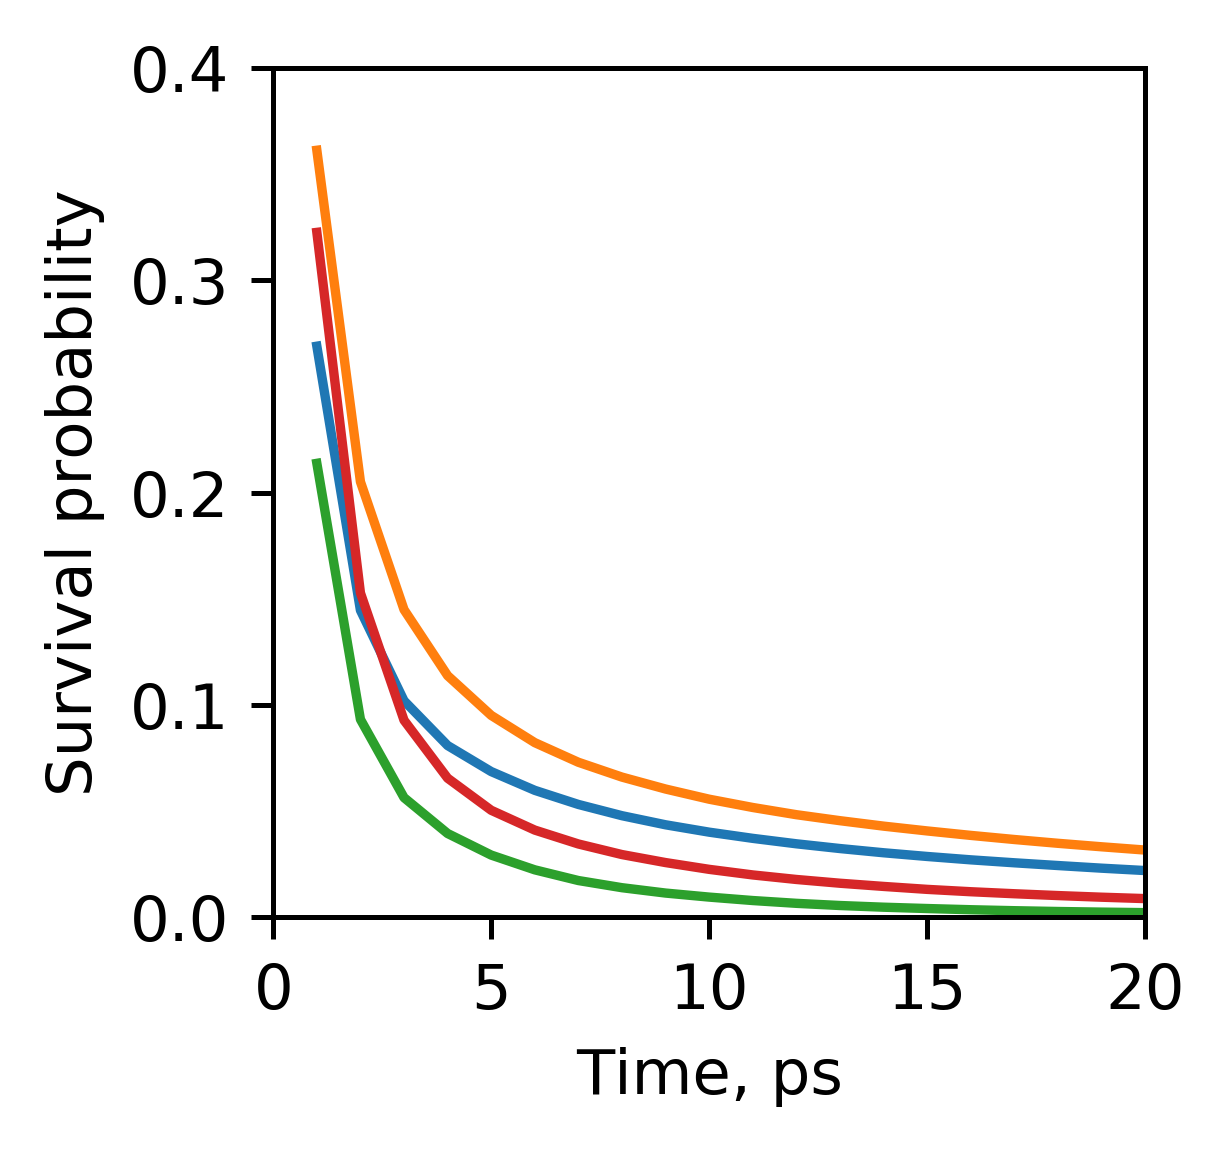

In [17]:
import MDAnalysis as mda
from MDAnalysis.analysis import rdf
import matplotlib.pyplot as plt
%matplotlib inline

fig,(ax1)=plt.subplots(1,figsize=(2.5,2.5),dpi=450)

ax1.set_xlim(0,20)
ax1.set_ylim(0,0.4)

plt.plot(sp_k1.tau_timeseries, sp_k1.sp_timeseries)
plt.plot(sp_na1.tau_timeseries, sp_na1.sp_timeseries)
#plt.plot(sp_k2.tau_timeseries, sp_k2.sp_timeseries)
#plt.plot(sp_na2.tau_timeseries, sp_na2.sp_timeseries)
plt.plot(sp_kl1.tau_timeseries, sp_kl1.sp_timeseries)
plt.plot(sp_nal1.tau_timeseries, sp_nal1.sp_timeseries)
#plt.plot(sp_kl2.tau_timeseries, sp_kl2.sp_timeseries)
#plt.plot(sp_nal2.tau_timeseries, sp_nal2.sp_timeseries)


plt.xlabel('Time, ps')
plt.ylabel('Survival probability')